### Visualization des sous-arbres communs à partir de l'identifiant de l'attribut
- rappel, l'identifiant d'un attribut représente un sous-graph commun en sortie de gspan - 

In [1]:
import json
import pandas as pd
import csv

def get_pattern(dictionnary, idx_attribute):
    """
    from a json dictionnary file and a pattern index, 
    print the pattern corresponding
    """
    with open(dictionnary) as dict_file:
        dict_idx_pattern = json.loads(dict_file.read())
        return dict_idx_pattern[str(idx_attribute)]
        
def get_objects(csv_context_path, idx_attribute, delim = "\t"):
    """
    gets the list of objects from a given context and a given attribute id
    """
    objects = []
    context_dtf = pd.read_csv(csv_context_path, sep = delim, index_col = 0, header = 0)
    #context_dtf[idx_attribute]
    objects = context_dtf.index[context_dtf[str(idx_attribute)] == 1].tolist()
    return objects

def get_attributes(csv_context_path, obj_idx, delim = "\t"):
    """
    gets the list of attributes from an object
    """
    context_dtf = pd.read_csv(csv_context_path, sep = delim, index_col = 0, header = 0)
    obj_attr = context_dtf.loc[obj_idx]
    # loop over attributes and register those that have truth val at 1
    attributes = []
    for (attr, truth_val) in obj_attr.iteritems():
        if truth_val == 1:
            attributes.append(attr)
    return attributes
    
def get_txt_id(corresp_path, idx, delim = "\t"):
    """
    from a csv file containing id + txt name
    outputs the txt name for given id
    """
    out = None
    with open(corresp_path) as dict_file:
        for line in dict_file.readlines():
            line = line.replace("\n","")
            (obj, txtname) = line.split(delim)
            if int(obj) == idx:
                out = txtname
    return out
    
def plot(str_graph):
    """
    Visualize the graph
    (adapted from )
    input format is : 
        t # 1
        v 0 _
        v 1 _
        v 2 _
        e 0 1 concession_r
        e 1 2 conjunction_m
    """
    try:
        import networkx as nx
        import matplotlib.pyplot as plt
    except Exception as e:
        print('Can not plot graph: {}'.format(e))
        return
    
    gnx = nx.Graph() # init networkx graph 
    vlbs = {} # set vertices labels
    elbs = {} # set edges labels
    for line in str_graph.split("\n"):
        if line == "" or line[0] == "t":
            pass
        # if it's a vertice definition
        elif line[0] == "v":
            (v, vid, label) = line.split(" ")
            vlbs[vid] = label
            gnx.add_node(vid, label=label)
        # if it's an edge definition
        elif line[0] == "e":
            (e, srcid, trgid, label) = line.split(" ")
            elbs[(srcid, trgid)] = label
            gnx.add_edge(srcid, trgid, label=label)
                         
    # plot
    fsize = (min(16, 1 * len(vlbs.keys())),
             min(16, 1 * len(vlbs.keys())))
    plt.figure(3, figsize=fsize)
    pos = nx.spectral_layout(gnx)
    nx.draw_networkx(gnx, pos, arrows=True, with_labels=True, labels=vlbs)
    nx.draw_networkx_edge_labels(gnx, pos, edge_labels=elbs)
    plt.show()

## SHOW RST SUBPATTERN - from attribute name -

In [93]:
# set the index of the attribute here
idx = 65

ATTRIBUTE IDX : 65

PATTERN (txt) : 
t # 65
v 0 CC
v 1 _
v 2 _
e 0 1 reason_r
e 0 2 reason_r




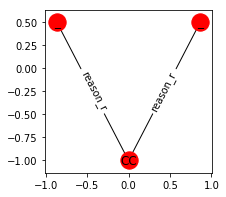

OBJECTS : 
	 -  5 => b006
	 -  12 => b013
	 -  14 => b015
	 -  18 => b019
	 -  19 => b020
	 -  21 => b022
	 -  25 => b026
	 -  29 => b030
	 -  33 => b034
	 -  35 => b036
	 -  56 => b058
	 -  59 => b061
	 -  65 => d04
	 -  71 => d10
	 -  78 => d17
	 -  83 => d22
	 -  87 => k003
	 -  9 => b010
	 -  22 => b023
	 -  54 => b056
	 -  97 => k014
	 -  24 => b025
	 -  76 => d15
	 -  6 => b007
	 -  20 => b021
	 -  23 => b024
	 -  26 => b027
	 -  27 => b028
	 -  30 => b031
	 -  32 => b033
	 -  42 => b044
	 -  80 => d19
	 -  86 => k002


In [94]:
#dic = "/Users/lhuber/Documents/Research/phd/workdir/argmicrotext_workdir/argmicrotext_contexts/rst_attr_patterns.json"
dic_txtids = "/Users/lhuber/Documents/Research/phd/workdir/argmicrotext_workdir/dictionnaries/rst_ids_txtname.csv"
context_path = "/Users/lhuber/Documents/Research/phd/workdir/argmicrotext_workdir/FCA_argmicrotexts/data/contexts/rst_context.csv"
dic = "/Users/lhuber/Documents/Research/phd/workdir/argmicrotext_workdir/FCA_argmicrotexts/data/contexts/rst_attr_patterns.json"

# print pattern attribute information
pattern = get_pattern(dic, idx)
print("ATTRIBUTE IDX : " + str(idx) + "\n")          
print("PATTERN (txt) : \n" + str(pattern))
plot(pattern)
print("OBJECTS : ")
for obj in get_objects(context_path, idx):
    print("\t -  " + str(obj) + " => " + get_txt_id(dic_txtids, obj))

## SHOW ARG SUBPATTERN - from attribute name -

In [99]:
# set the index of the attribute here
idx_attr = 57

ATTRIBUTE IDX : 57

PATTERN (txt) : 
t # 57
v 0 CC
v 1 _
v 2 _
e 0 1 sup
e 0 2 sup




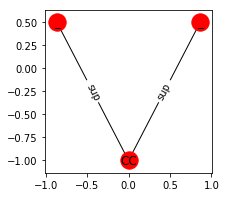

OBJECTS : 
	 -  9 => b010
	 -  18 => b019
	 -  20 => b021
	 -  22 => b023
	 -  23 => b024
	 -  27 => b028
	 -  37 => b038
	 -  38 => b039
	 -  39 => b040
	 -  40 => b041
	 -  43 => b045
	 -  47 => b049
	 -  49 => b051
	 -  54 => b056
	 -  56 => b058
	 -  60 => b062
	 -  61 => b064
	 -  65 => d04
	 -  90 => k007
	 -  93 => k010
	 -  94 => k011
	 -  97 => k014
	 -  101 => k018
	 -  103 => k020
	 -  105 => k022
	 -  107 => k024
	 -  111 => k031
	 -  1 => b002
	 -  5 => b006
	 -  21 => b022
	 -  25 => b026
	 -  36 => b037
	 -  41 => b042
	 -  53 => b055
	 -  57 => b059
	 -  64 => d03
	 -  67 => d06
	 -  76 => d15
	 -  79 => d18
	 -  89 => k006
	 -  92 => k009
	 -  95 => k012
	 -  96 => k013
	 -  100 => k017
	 -  102 => k019
	 -  19 => b020
	 -  72 => d11
	 -  84 => d23
	 -  13 => b014
	 -  16 => b017
	 -  26 => b027
	 -  50 => b052
	 -  55 => b057
	 -  66 => d05
	 -  69 => d08
	 -  78 => d17
	 -  109 => k027
	 -  24 => b025
	 -  30 => b031
	 -  31 => b032
	 -  32 => b033
	 -  33 => b034
	 

In [100]:
#dic = "/Users/lhuber/Documents/Research/phd/workdir/argmicrotext_workdir/argmicrotext_contexts/rst_attr_patterns.json"
dic_txtids = "/Users/lhuber/Documents/Research/phd/workdir/argmicrotext_workdir/dictionnaries/arg_ids_txtname.csv"
context_path = "/Users/lhuber/Documents/Research/phd/workdir/argmicrotext_workdir/FCA_argmicrotexts/data/contexts/arg_context.csv"
dic = "/Users/lhuber/Documents/Research/phd/workdir/argmicrotext_workdir/FCA_argmicrotexts/data/contexts/arg_attr_patterns.json"

# print pattern attribute information
pattern = get_pattern(dic, idx_attr)
print("ATTRIBUTE IDX : " + str(idx_attr) + "\n")          
print("PATTERN (txt) : \n" + str(pattern))
plot(pattern)
print("OBJECTS : ")
for obj in get_objects(context_path, idx_attr):
    print("\t -  " + str(obj) + " => " + get_txt_id(dic_txtids, obj))

## SHOW ARG et RST SUBPATTERNS - from an object name - 

In [89]:
idx_obj = 87

OBJECT : k003
ATTRIBUTES : 
ARG > 


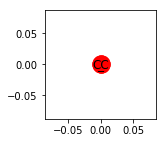

t # 13
v 0 CC
v 1 _
e 0 1 reb


ARG > 


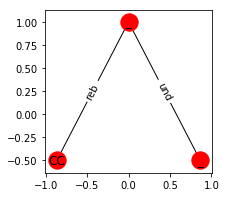

t # 21
v 0 CC
v 1 _
v 2 _
e 0 1 reb
e 1 2 und


ARG > 


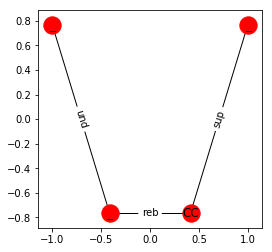

t # 22
v 0 CC
v 1 _
v 2 _
v 3 _
e 0 1 reb
e 0 3 sup
e 1 2 und


ARG > 


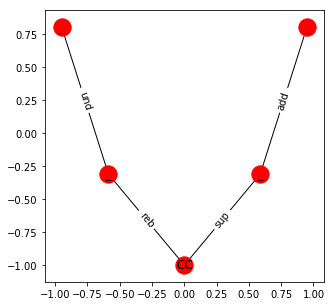

t # 25
v 0 CC
v 1 _
v 2 _
v 3 _
v 4 _
e 0 1 reb
e 0 3 sup
e 1 2 und
e 3 4 add


ARG > 


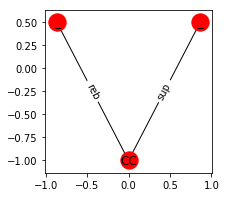

t # 34
v 0 CC
v 1 _
v 2 _
e 0 1 reb
e 0 2 sup


ARG > 


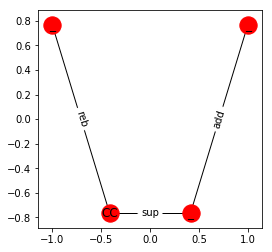

t # 43
v 0 CC
v 1 _
v 2 _
v 3 _
e 0 1 reb
e 0 2 sup
e 2 3 add


ARG > 


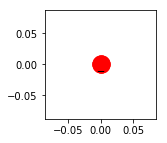

t # 5
v 0 _
v 1 _
e 0 1 und


ARG > 


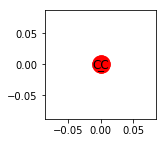

t # 56
v 0 CC
v 1 _
e 0 1 sup


ARG > 


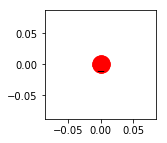

t # 7
v 0 _
v 1 _
e 0 1 add


ARG > 


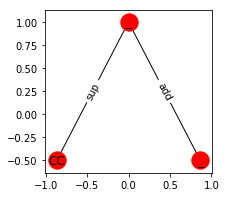

t # 76
v 0 CC
v 1 _
v 2 _
e 0 1 sup
e 1 2 add


RST > 


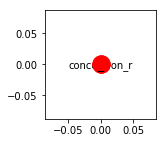

t # 0
v 0 _
v 1 _
e 0 1 concession_r


RST > 


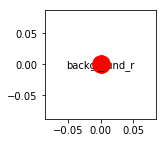

t # 52
v 0 _
v 1 _
e 0 1 background_r


RST > 


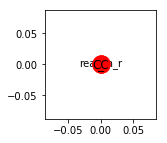

t # 57
v 0 CC
v 1 _
e 0 1 reason_r


RST > 


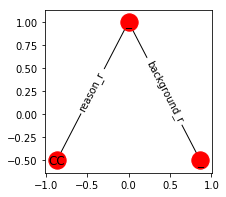

t # 58
v 0 CC
v 1 _
v 2 _
e 0 1 reason_r
e 1 2 background_r


RST > 


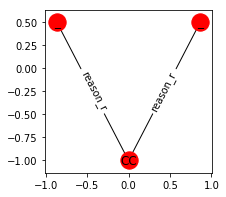

t # 65
v 0 CC
v 1 _
v 2 _
e 0 1 reason_r
e 0 2 reason_r


RST > 


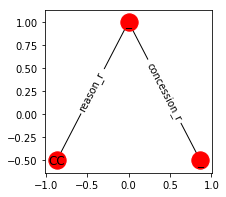

t # 67
v 0 CC
v 1 _
v 2 _
e 0 1 reason_r
e 1 2 concession_r


RST > 


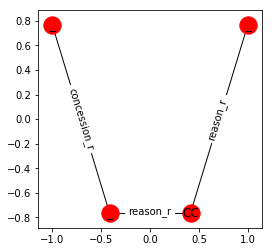

t # 68
v 0 CC
v 1 _
v 2 _
v 3 _
e 0 1 reason_r
e 0 3 reason_r
e 1 2 concession_r




In [90]:
arg_dic = "/Users/lhuber/Documents/Research/phd/workdir/argmicrotext_workdir/FCA_argmicrotexts/data/contexts/arg_attr_patterns.json"
rst_dic = "/Users/lhuber/Documents/Research/phd/workdir/argmicrotext_workdir/FCA_argmicrotexts/data/contexts/rst_attr_patterns.json"
dic_txtids = "/Users/lhuber/Documents/Research/phd/workdir/argmicrotext_workdir/dictionnaries/arg_ids_txtname.csv"
context_path = "/Users/lhuber/Documents/Research/phd/workdir/argmicrotext_workdir/FCA_argmicrotexts/data/contexts/arg_output.csv"
glob_path = "/Users/lhuber/Documents/Research/phd/workdir/argmicrotext_workdir/FCA_argmicrotexts/data/contexts/merged_context.csv"

print("OBJECT : " + get_txt_id(dic_txtids, idx_obj))
print("ATTRIBUTES : ")
attributes = get_attributes(glob_path, idx_obj)
for attr in attributes:
    # print type of annot,
    # remove annot identifiers,
    # and retrieve pattern corresponding to id
    if attr[0] == "a":
        print("ARG > ")
        attr = attr.replace("a_", "")
        pattern = get_pattern(arg_dic, attr)
    if attr[0] == "r":
        print("RST > ")
        attr = attr.replace("r_", "")
        pattern = get_pattern(rst_dic, attr)
    if attr[0] == "s":
        print("SDRT > ")
        attr = attr.replace("s_", "")
    
    # plot pattern
    plot(pattern)
    print(pattern)